<h2> Introduction</h2>

<h3>The goal of this project is to examine the impact gamification has on the learning effectiveness of university and graduate students. For context, the data also includes demographics of the survey participants, and the online survey-based data was collected from previous studies with university and graduate students in Vietnam.</h3>

In [74]:
#Set up environment and import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [5]:
# Set style for plots
sns.set_style("darkgrid")

In [9]:
#Load and prepare data
df = pd.read_csv('/Users/biancameneses/Library/Mobile Documents/com~apple~CloudDocs/Desktop/PROJECTS/Python portfolio/Learning Outcomes on Gamification Method/Outcomes on Gamification Learning Experience.csv')

In [11]:
# Check the first few rows and data info
print(df.head())
print(df.info())

   CO1  CO2  CO3  ENJ1  ENJ2  ENJ3  ENJ4  CH1  CH2  CH3  ...  IM2  IM3  IM4  \
0  4.0  4.0  4.0   3.0   3.0   3.0   3.0  3.0  3.0  3.0  ...  3.0  3.0  3.0   
1  4.0  4.0  5.0   5.0   5.0   5.0   5.0  5.0  5.0  5.0  ...  5.0  5.0  5.0   
2  5.0  5.0  5.0   5.0   5.0   5.0   5.0  5.0  5.0  5.0  ...  5.0  3.0  5.0   
3  4.0  3.0  5.0   4.0   5.0   5.0   5.0  3.0  3.0  4.0  ...  4.0  4.0  4.0   
4  4.0  4.0  5.0   3.0   3.0   3.0   3.0  3.0  4.0  4.0  ...  3.0  4.0  3.0   

   EP1  EP2  EP3  Gender  Age  Education  Area  
0  3.0  3.0  3.0     0.0  0.0        0.0   0.0  
1  4.0  4.0  4.0     1.0  0.0        0.0   1.0  
2  5.0  5.0  5.0     0.0  0.0        0.0   1.0  
3  4.0  1.0  2.0     1.0  2.0        0.0   1.0  
4  4.0  4.0  4.0     1.0  0.0        0.0   1.0  

[5 rows x 30 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 30 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CO1        255 non

Legend: CO = Competitiveness; CH = Challenge; ENJ = Enjoyment; ENG = Engagement; SA = Satisfaction; IM = Intrinsic Motivation; EP = Learning Effectiveness; Area: 0 = Ha Noi City and 1 = Ho Chi Minh City; Gender: 0 = Male and 1 = Female; Age: 0 = 18 years to 22 years, 1 = 22 years to 26 years, 2 = 26 years to 30 years, and 3 = Over 30 years; Education: 0 = Student and 1 = MA Student

In [17]:
#Calculate mean scores for each gamification element
df['CO_mean'] = df[['CO1', 'CO2', 'CO3']].mean(axis=1)
df['ENJ_mean'] = df[['ENJ1', 'ENJ2', 'ENJ3', 'ENJ4']].mean(axis=1)
df['CH_mean'] = df[['CH1', 'CH2', 'CH3', 'CH4']].mean(axis=1)
df['ENG_mean'] = df[['ENG1', 'ENG2', 'ENG3', 'ENG4', 'ENG5']].mean(axis=1)
df['SA_mean'] = df[['SA1', 'SA2', 'SA3']].mean(axis=1)
df['IM_mean'] = df[['IM1', 'IM2', 'IM3', 'IM4']].mean(axis=1)
df['EP_mean'] = df[['EP1', 'EP2', 'EP3']].mean(axis=1)

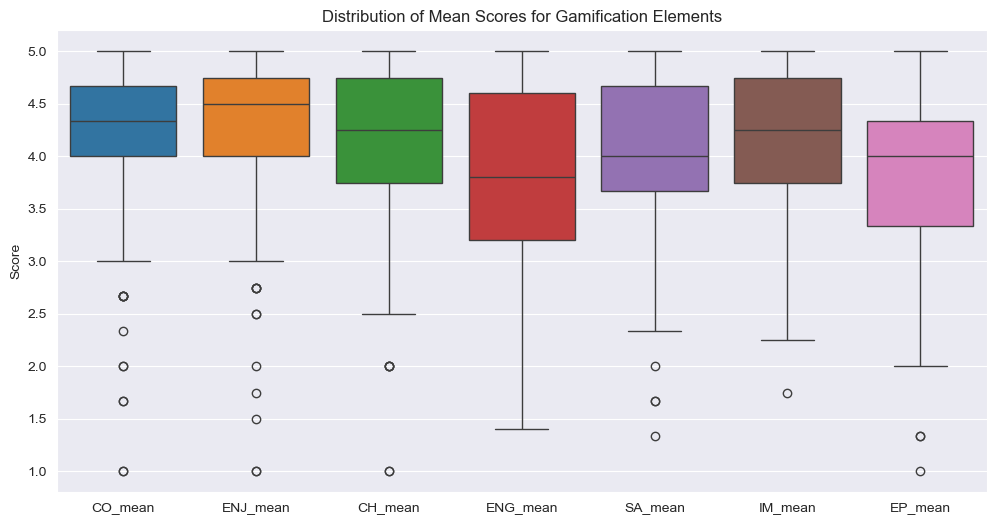

In [19]:
# Create a box plot of mean scores
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['CO_mean', 'ENJ_mean', 'CH_mean', 'ENG_mean', 'SA_mean', 'IM_mean', 'EP_mean']])
plt.title('Distribution of Mean Scores for Gamification Elements')
plt.ylabel('Score')
plt.show()

Based on the distribution of mean scores above, we notice there are outliers below the minimum data value for competitiveness (CO), enjoyment (ENJ), challenge (CH), satisfaction (SA), intrinsic motivation (IM), and learning effectiveness (EP). Note that ENJ has the most outliers, and we would need to find whether the outliers for all sets are errors in the data or determine why they are unusual for some other reason.

Further, some general observations about the above box plots are as follows: 

The box plots for engagement (ENG_mean) and learning effectiveness (EP_mean) are comparatively tall. This suggests survey respondents hold quite different opinions about the gamification element of engagement and the learning effectiveness. 

The learning effectiveness (EP_mean) box plot is much lower than all other box plots, even though it has a median score of 4.0, which is the similar and/or close to the median of all the other box plots. This shows that survey respondents have very different distributions of views on learning effectiveness. 

The 4 sections of ALL box plots are uneven in size. This shows that many survey respondents have similar views at certain parts of the scale, but in other parts of the scale respondents are more variable in their views. The long lower whisker in each box plot means that respondents' views are varied amongst the lower quartile group.

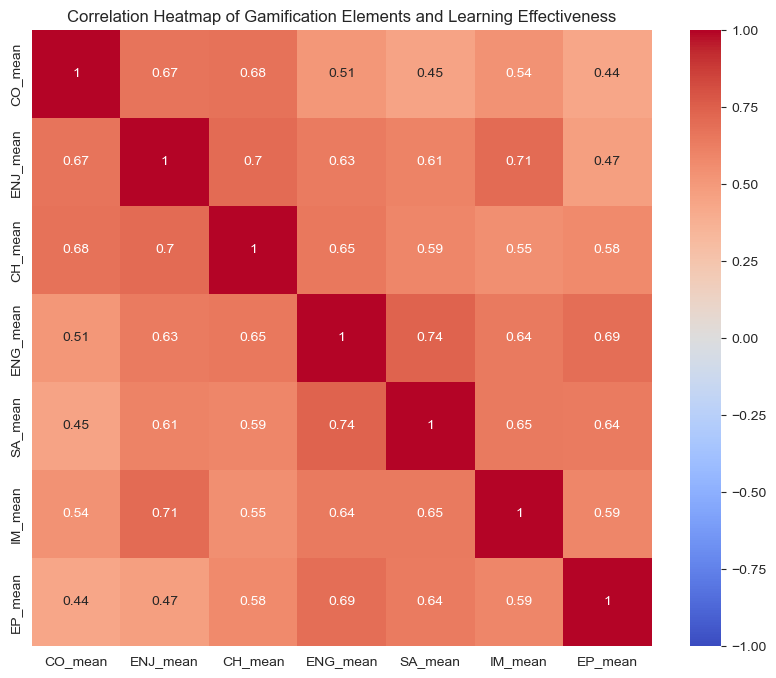

In [22]:
# Calculate correlation matrix
corr_matrix = df[['CO_mean', 'ENJ_mean', 'CH_mean', 'ENG_mean', 'SA_mean', 'IM_mean', 'EP_mean']].corr()

# Create a heatmap of correlations
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of Gamification Elements and Learning Effectiveness')
plt.show()

At first observation, we notice that engagement (ENG) and satisfaction (SA) gamification elements have relatively high positive correlation. When assessing what gamification element(s) correlates with learning effectiveness (EP), ENG has relative high positive correlation.

In [29]:
# Function to perform linear regression and return p-value
def linear_regression_p_value(x, y):
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    return p_value

# Perform linear regression for each element with EP_mean
elements = ['CO_mean', 'ENJ_mean', 'CH_mean', 'ENG_mean', 'SA_mean', 'IM_mean']
p_values = []

for element in elements:
    p_value = linear_regression_p_value(df[element], df['EP_mean'])
    p_values.append(p_value)

# Create a dataframe of p-values
p_value_df = pd.DataFrame({'Element': elements, 'P-value': p_values})
p_value_df = p_value_df.sort_values('P-value')

print("P-values for linear regression with Learning Effectiveness:")
print(p_value_df)

P-values for linear regression with Learning Effectiveness:
    Element  P-value
0   CO_mean      NaN
1  ENJ_mean      NaN
2   CH_mean      NaN
3  ENG_mean      NaN
4   SA_mean      NaN
5   IM_mean      NaN


'NaN' means 'not a number'. What’s happened here is that there is so little variation in the elements used that we cannot calculate the p value; the calculation breaks down in this extreme case.

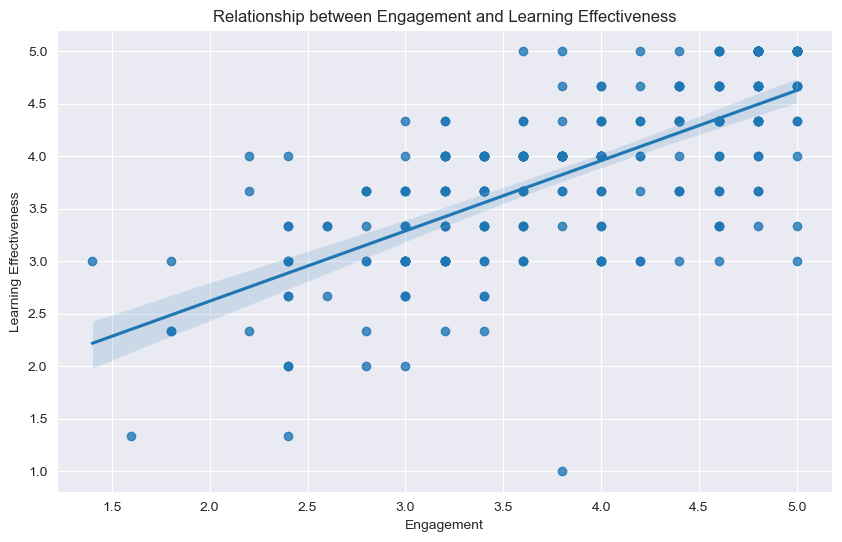

In [36]:
# Get the element with relatively high positive correlation with EP
most_significant_element = 'ENG_mean'

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.regplot(x=most_significant_element, y='EP_mean', data=df)
plt.title(f'Relationship between Engagement and Learning Effectiveness')
plt.xlabel('Engagement')
plt.ylabel('Learning Effectiveness')
plt.show()

Engagement and learning effectiveness have a moderately positive association because as engagement increases, so does learning effectiveness. 

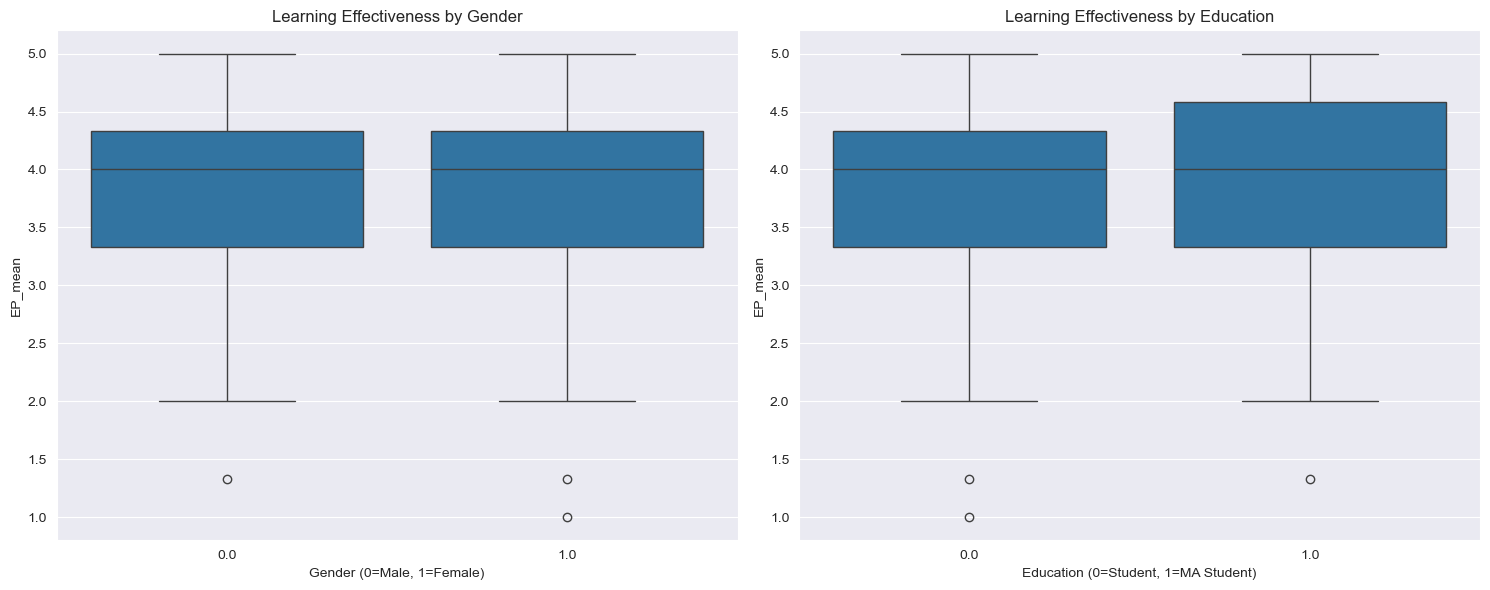

T-test results for Gender impact on Learning Effectiveness:
t-statistic: -0.1030, p-value: 0.9181

T-test results for Education impact on Learning Effectiveness:
t-statistic: -0.2138, p-value: 0.8308


In [40]:
# Create box plots for Learning Effectiveness by Gender and Education
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

sns.boxplot(x='Gender', y='EP_mean', data=df, ax=ax1)
ax1.set_title('Learning Effectiveness by Gender')
ax1.set_xlabel('Gender (0=Male, 1=Female)')

sns.boxplot(x='Education', y='EP_mean', data=df, ax=ax2)
ax2.set_title('Learning Effectiveness by Education')
ax2.set_xlabel('Education (0=Student, 1=MA Student)')

plt.tight_layout()
plt.show()

# Perform t-tests for Gender and Education
gender_ttest = stats.ttest_ind(df[df['Gender'] == 0]['EP_mean'], df[df['Gender'] == 1]['EP_mean'])
education_ttest = stats.ttest_ind(df[df['Education'] == 0]['EP_mean'], df[df['Education'] == 1]['EP_mean'])

print("T-test results for Gender impact on Learning Effectiveness:")
print(f"t-statistic: {gender_ttest.statistic:.4f}, p-value: {gender_ttest.pvalue:.4f}")

print("\nT-test results for Education impact on Learning Effectiveness:")
print(f"t-statistic: {education_ttest.statistic:.4f}, p-value: {education_ttest.pvalue:.4f}")

Overall, the box plots are close to being the same position and size, with the exception of MA student box plot. However, based on the p-value reported from each t-test is greater than 0.05, the results are insignificant, meaning gender and education have no significant impact on learning effectiveness. 

<h2>Summary</h2>

<h3>Based on the box plots between the mean score of each gamification elements, it is important we observe there are outliers below the minimum data value for multiple gamification elements, with enjoyment (ENJ) having the most outliers. We would need to review our dataset and find whether the outliers for all sets are errors in the data or determine why they are unusual for some other reason.</h3>

<h3>We observe a relatively high positive correlation between engagement (ENG) and satisfaction (SA) elements, and ENG has the highest correlation to learning effectiveness. However, when conducting a statistical test to determine significant relationships between factors, the result revealed there is little variation in the elements that we cannot calculate the p-value. We instead used the results from the heatmap and created a scatter plot to visualize the moderately positive association between engagement and learning effectiveness.</h3>

<h3>Lastly, gender and education have no significant impact on learning effectiveness based on the p-values reported from the t-tests.</h3> 

<h2> So What?</h2>

<h3>There are data quality concerns and limitations with our dataset. Overall, we must address the following concerns: 
<h3>1. Data quality concerns: The presence of outliers, especially in the enjoyment element, suggests a need for data validation and further investigation. This is crucial because outliers can significantly affect the results and interpretations.</h3>
<h3>2. Limited statistical significance: The analysis failed to establish statistically significant relationships between the gamification elements due to little variation in the data. This limits the strength of conclusions that can be drawn about the relationships between these elements.</h3>
<h3>3. Potential importance of engagement: Despite the statistical limitations, the data suggests that engagement might be an important factor in learning effectiveness. This is based on the observed correlations and visualizations, though it is not statistically confirmed.</h3>
<h3>4. Non-impact of demographic factors: The analysis found that gender and education level do not significantly impact learning effectiveness in this context. This suggests that the gamification elements might work equally well across different demographic groups.</h3>
<h3>5. Need for further research: The inconclusive statistical results and the presence of outliers indicate that more robust research might be needed to draw definitive conclusions about the relationships between gamification elements and learning effectiveness.</h3>

<h3>The key takeaway is that while the analysis provides some insights, particularly about engagement and demographic factors, it also reveals limitations in the current data and analysis methods. This suggests a need for more refined data collection and analysis techniques in future studies to better understand the relationships between gamification elements and learning effectiveness.</h3>